In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import scipy as sp
from python_speech_features import mfcc, logfbank
import speech_recognition as sr 
import math
from scipy.signal import hilbert
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

from signal import signal

In [2]:
signal, sr = librosa.load("test.wav")

In [3]:
yf = librosa.util.frame(signal, frame_length=256, hop_length=128)

yf = yf.T
n = 256
m = yf.shape[0]
err = np.zeros((m, n))

y_predicted = np.zeros(yf.shape)
for i in range(yf.shape[0]):
    a = librosa.lpc(yf[i], order=10)
    a = -a[1:]
    a = np.insert(a,0,0)
    y_predicted[i] = sp.signal.lfilter(a, [1], yf[i])
    err[i:i+1] = yf[i] - y_predicted[i]

/Users/Arshini/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


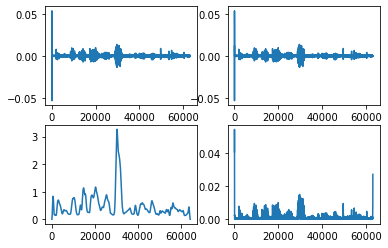

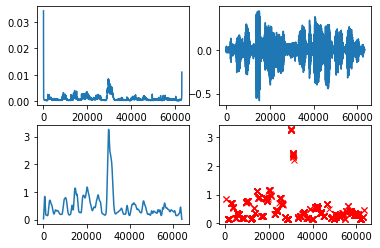

In [5]:
he = np.zeros((m,n))

comb = y_predicted[0]
for i in range(1,y_predicted.shape[0]): # Combining back the frames
    comb = np.append(comb,y_predicted[i][128:])

err = signal[0:63232] - comb


In [ ]:
analytical_signal = hilbert(err)
amplitude_envelope = np.abs(analytical_signal)

flat_hilbert = hilbert(err)
fogd = gaussian_filter1d(amplitude_envelope,sigma=10)
window = np.hamming(1024)
smooth_hilbert = np.convolve(amplitude_envelope,window)
peakk,_ = find_peaks(smooth_hilbert)

fogd2 = gaussian_filter1d(smooth_hilbert,sigma=10)

plt.subplot(2,2,1)
plt.plot(flat_hilbert)


plt.subplot(2,2,2)
plt.plot(err)


plt.subplot(2,2,3)
plt.plot(smooth_hilbert)


plt.subplot(2,2,4)  
plt.plot(amplitude_envelope)


plt.savefig('lp.png')
plt.show()

plt.subplot(2,2,1)
plt.plot(fogd)


plt.subplot(2,2,2)
plt.plot(signal)


plt.subplot(2,2,3)
plt.plot(fogd2)


plt.subplot(2,2,4)  
plt.plot(peakk, smooth_hilbert[peakk],"xr")

plt.savefig('lp2.png')
plt.show()